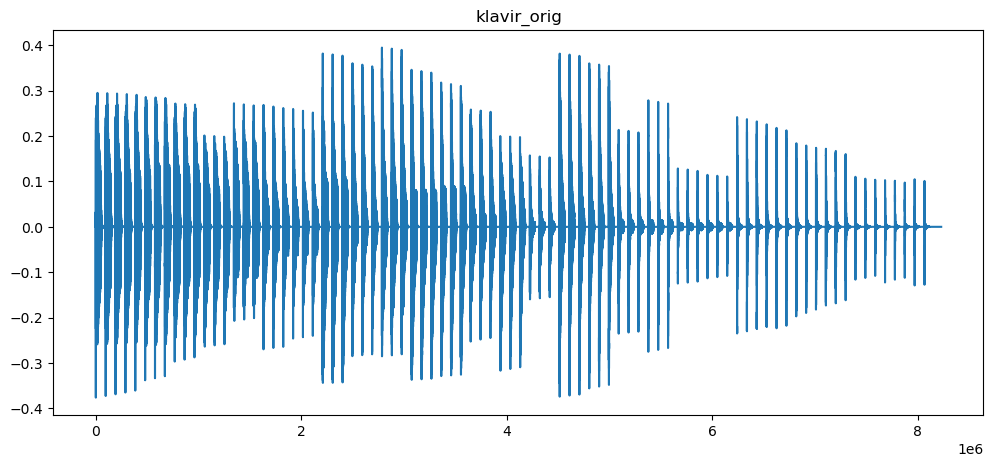

In [37]:
import numpy as np
import pylab as pl
import scipy
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio
MIDIFROM = 24
MIDITO = 108
SKIP_SEC = 0.25
HOWMUCH_SEC = 0.5
WHOLETONE_SEC = 2
howmanytones = MIDITO - MIDIFROM + 1
tones = np.arange(MIDIFROM, MIDITO+1)
s, Fs = sf.read("../audio/klavir.wav")

plt.figure(figsize=(12,5))
plt.title('klavir_orig')
plt.plot(s)
plt.show()
N = int(Fs * HOWMUCH_SEC)
Nwholetone = int(Fs * WHOLETONE_SEC)
TIME = np.linspace(0,1/Fs,num=Fs)

xall = np.zeros((MIDITO+1, N)) # matrix with all tones - first signals empty,
# but we have plenty of memory ...
samplefrom = int(SKIP_SEC * Fs)
sampleto = samplefrom + N
for tone in tones:
    x = s[samplefrom:sampleto]
    x = x - np.mean(x) # safer to center ...
    xall[tone,:] = x

    DFT = np.fft.fft(x)


    samplefrom += Nwholetone
    sampleto += Nwholetone

# ÚKOL 4.1

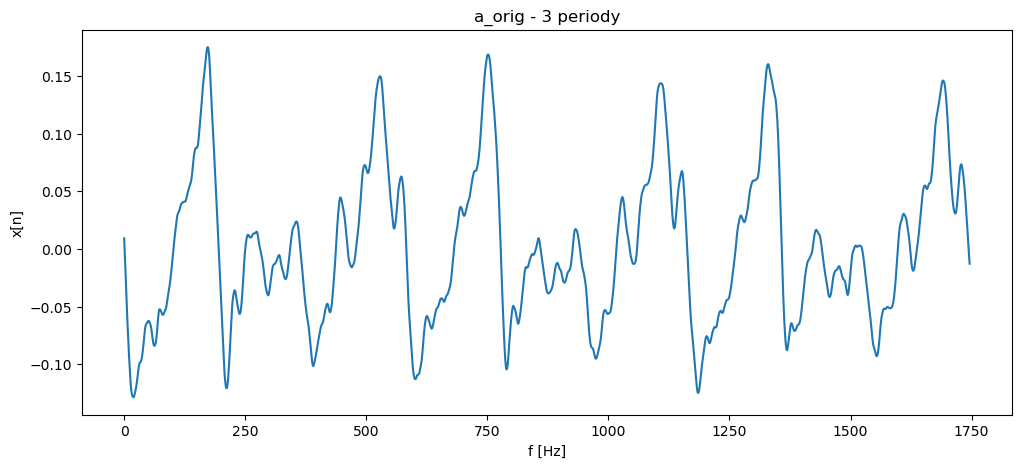

In [44]:
MIDI_A = 40
MIDI_A_F = 82.41
#MIDI A
plt.figure(figsize=(12,5))
plt.title('a_orig - 3 periody')
TONE_A = xall[MIDI_A]
sf.write('../audio/a_orig.wav', TONE_A, Fs)
plt.plot(TONE_A[0:int(3*Fs/MIDI_A_F)])
plt.xlabel('f [Hz]')
plt.ylabel('x[n]')
plt.show()
display(Audio(TONE_A, rate=Fs))

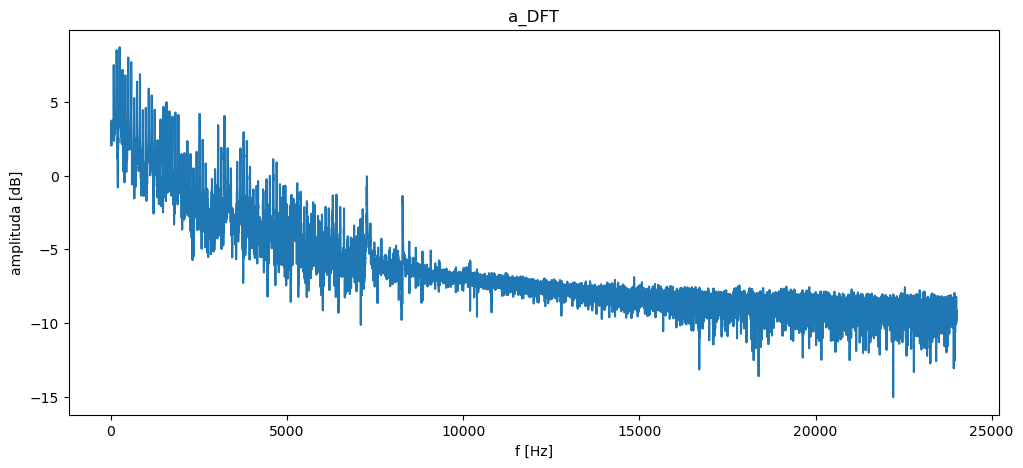

In [53]:
#MIDI A DFT
TONE_A_DFT = np.fft.fft(TONE_A)
TONE_A_DFT = np.abs(TONE_A_DFT)
TONE_A_DFT = TONE_A_DFT[:TONE_A_DFT.size//2]
F = np.arange(TONE_A_DFT.size) * Fs / TONE_A.size
plt.figure(figsize=(12,5))
plt.title('a_DFT')
plt.xlabel('f [Hz]')
plt.ylabel('amplituda [dB]')
logDFT = np.log2(TONE_A_DFT)
plt.plot(F[1:], logDFT[1:])
plt.show()

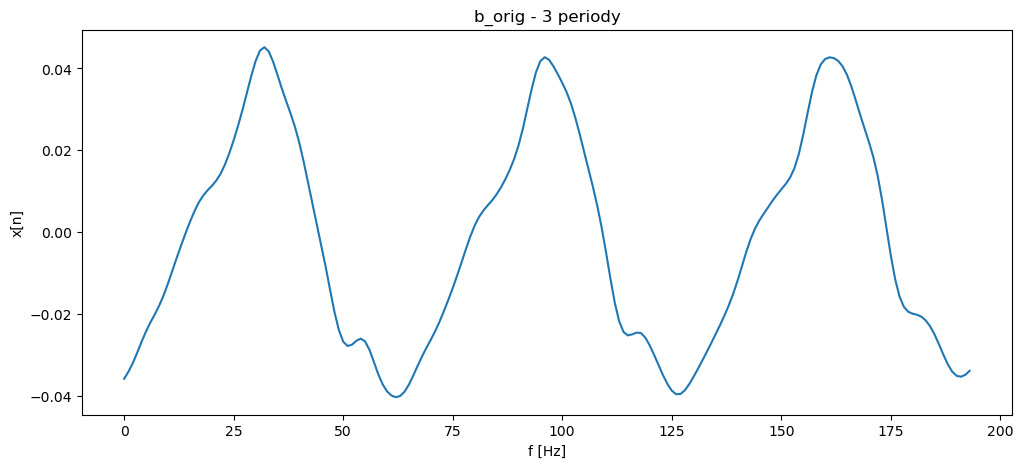

In [45]:
MIDI_B = 78
MIDI_B_F = 739.99
#MIDI B
plt.figure(figsize=(12,5))
plt.title('b_orig - 3 periody')
TONE_B = xall[MIDI_B]
sf.write('../audio/b_orig.wav', TONE_B, Fs)
plt.plot(TONE_B[0:int(3*Fs/MIDI_B_F)])
plt.xlabel('f [Hz]')
plt.ylabel('x[n]')
plt.show()
display(Audio(TONE_B, rate=Fs))

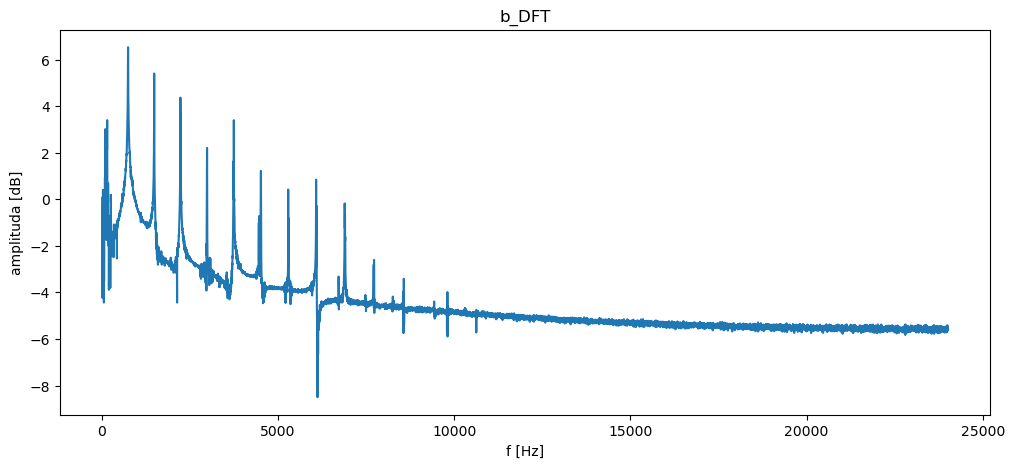

In [41]:
#MIDI B DFT
TONE_B_DFT = np.fft.fft(TONE_B)
TONE_B_DFT = np.abs(TONE_B_DFT)
TONE_B_DFT = TONE_B_DFT[:TONE_B_DFT.size//2]
F = np.arange(TONE_B_DFT.size) * Fs / TONE_B.size
plt.figure(figsize=(12,5))
plt.title('b_DFT')
plt.xlabel('f [Hz]')
plt.ylabel('amplituda [dB]')
logDFT = np.log2(TONE_B_DFT)
plt.plot(F[1:], logDFT[1:])
plt.show()

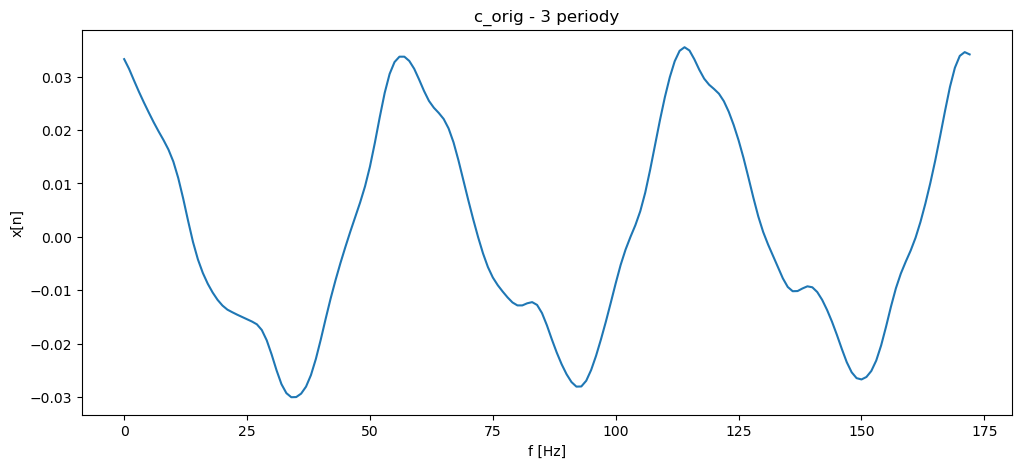

In [46]:
MIDI_C = 80
MIDI_C_F = 830.61
#MIDI C
plt.figure(figsize=(12,5))
plt.title('c_orig - 3 periody')
TONE_C = xall[MIDI_C]
sf.write('../audio/c_orig.wav', TONE_C, Fs)
plt.plot(TONE_C[0:int(3*Fs/MIDI_C_F)])
plt.xlabel('f [Hz]')
plt.ylabel('x[n]')
plt.show()
display(Audio(TONE_C, rate=Fs))

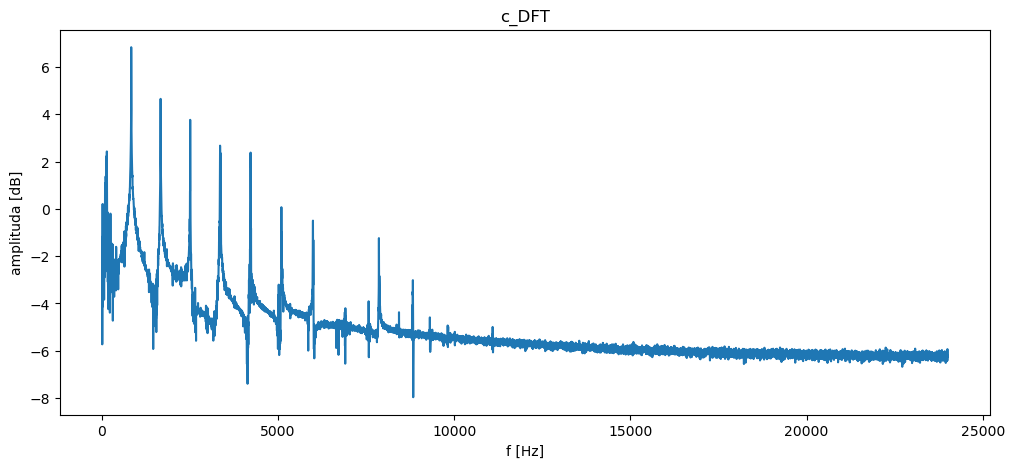

In [43]:
#MIDI C DFT
TONE_C_DFT = np.fft.fft(TONE_C)
TONE_C_DFT = np.abs(TONE_C_DFT)
TONE_C_DFT = TONE_C_DFT[:TONE_C_DFT.size//2]
F = np.arange(TONE_C_DFT.size) * Fs / TONE_C.size
plt.figure(figsize=(12,5))
plt.title('c_DFT')
plt.xlabel('f [Hz]')
plt.ylabel('amplituda [dB]')
logDFT = np.log2(TONE_C_DFT)
plt.plot(F[1:], logDFT[1:])
plt.show()

# ÚKOL 4.2

### AUTOKORELACE

In [92]:
i = 24
f0_inacurrate = np.zeros(MIDITO+1)
for TONE in xall[i:42]:
    corr = np.correlate(TONE, TONE,"full")
    peak1 = scipy.signal.find_peaks(corr[corr.size//2-1:], max(corr[corr.size//2:])/1.4)[0][0]
    peak2 = scipy.signal.find_peaks(corr[corr.size//2-1:], max(corr[corr.size//2:])/1.4)[0][1]
    f0_inacurrate[i] = 1/(peak2-peak1)*Fs;
    print('MIDI',i,"f0", (1/(peak2-peak1)*Fs).round(3), "\t[autokorelace]")

    i = i+1

MIDI 24 f0 32.809 	[autokorelace]
MIDI 25 f0 34.757 	[autokorelace]
MIDI 26 f0 36.838 	[autokorelace]
MIDI 27 f0 39.024 	[autokorelace]
MIDI 28 f0 41.344 	[autokorelace]
MIDI 29 f0 43.796 	[autokorelace]
MIDI 30 f0 46.422 	[autokorelace]
MIDI 31 f0 49.18 	[autokorelace]
MIDI 32 f0 52.117 	[autokorelace]
MIDI 33 f0 55.172 	[autokorelace]
MIDI 34 f0 58.465 	[autokorelace]
MIDI 35 f0 61.935 	[autokorelace]
MIDI 36 f0 65.574 	[autokorelace]
MIDI 37 f0 69.465 	[autokorelace]
MIDI 38 f0 73.62 	[autokorelace]
MIDI 39 f0 77.922 	[autokorelace]
MIDI 40 f0 82.616 	[autokorelace]
MIDI 41 f0 87.751 	[autokorelace]


### Tón 40

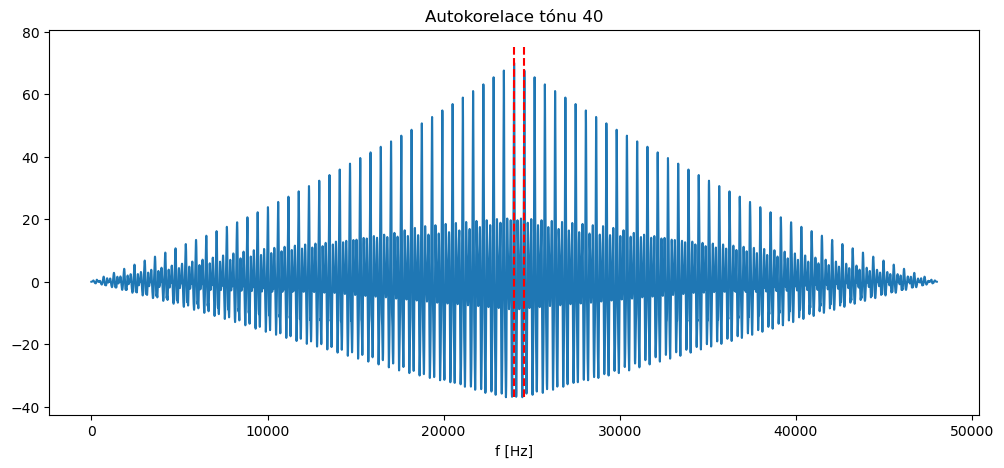

In [112]:
TONE_A_autocorr = np.correlate(TONE_A, TONE_A,"full")
peak1 = scipy.signal.find_peaks(TONE_A_autocorr[TONE_A_autocorr.size//2-1:], max(TONE_A_autocorr[TONE_A_autocorr.size//2:])/1.4)[0][0]
peak2 = scipy.signal.find_peaks(TONE_A_autocorr[TONE_A_autocorr.size//2-1:], max(TONE_A_autocorr[TONE_A_autocorr.size//2:])/1.4)[0][1]
plt.figure(figsize=(12,5))
plt.title('Autokorelace tónu 40')
plt.xlabel('f [Hz]')
plt.plot(TONE_A_autocorr)
plt.vlines(TONE_A_autocorr.size//2 - 1 + peak1, min(TONE_A_autocorr),max(TONE_A_autocorr)+5, colors='red', linestyles='dashed')
plt.vlines(TONE_A_autocorr.size//2 - 1 + peak2, min(TONE_A_autocorr),max(TONE_A_autocorr)+5, colors='red', linestyles='dashed')
plt.show()

### DFT

In [62]:
i = 42
for TONE in xall[42:]:
    DFT = np.fft.fft(TONE)
    f0 = (np.arange(DFT.size) * Fs / TONE.size)[np.argmax(np.abs(DFT[:DFT.size//2]))]
    print('MIDI',i,"f0", f0, "\t[DFT]")
    f0_inacurrate[i] = f0
    i+=1


MIDI 42 f0 92.0 	[DFT]
MIDI 43 f0 98.0 	[DFT]
MIDI 44 f0 104.0 	[DFT]
MIDI 45 f0 110.0 	[DFT]
MIDI 46 f0 118.0 	[DFT]
MIDI 47 f0 124.0 	[DFT]
MIDI 48 f0 130.0 	[DFT]
MIDI 49 f0 138.0 	[DFT]
MIDI 50 f0 146.0 	[DFT]
MIDI 51 f0 156.0 	[DFT]
MIDI 52 f0 164.0 	[DFT]
MIDI 53 f0 350.0 	[DFT]
MIDI 54 f0 370.0 	[DFT]
MIDI 55 f0 392.0 	[DFT]
MIDI 56 f0 208.0 	[DFT]
MIDI 57 f0 220.0 	[DFT]
MIDI 58 f0 234.0 	[DFT]
MIDI 59 f0 248.0 	[DFT]
MIDI 60 f0 262.0 	[DFT]
MIDI 61 f0 278.0 	[DFT]
MIDI 62 f0 294.0 	[DFT]
MIDI 63 f0 312.0 	[DFT]
MIDI 64 f0 330.0 	[DFT]
MIDI 65 f0 350.0 	[DFT]
MIDI 66 f0 370.0 	[DFT]
MIDI 67 f0 392.0 	[DFT]
MIDI 68 f0 416.0 	[DFT]
MIDI 69 f0 440.0 	[DFT]
MIDI 70 f0 466.0 	[DFT]
MIDI 71 f0 494.0 	[DFT]
MIDI 72 f0 524.0 	[DFT]
MIDI 73 f0 554.0 	[DFT]
MIDI 74 f0 588.0 	[DFT]
MIDI 75 f0 622.0 	[DFT]
MIDI 76 f0 660.0 	[DFT]
MIDI 77 f0 698.0 	[DFT]
MIDI 78 f0 740.0 	[DFT]
MIDI 79 f0 784.0 	[DFT]
MIDI 80 f0 830.0 	[DFT]
MIDI 81 f0 882.0 	[DFT]
MIDI 82 f0 932.0 	[DFT]
MIDI 83 f0 988.0 	

### Tón 78

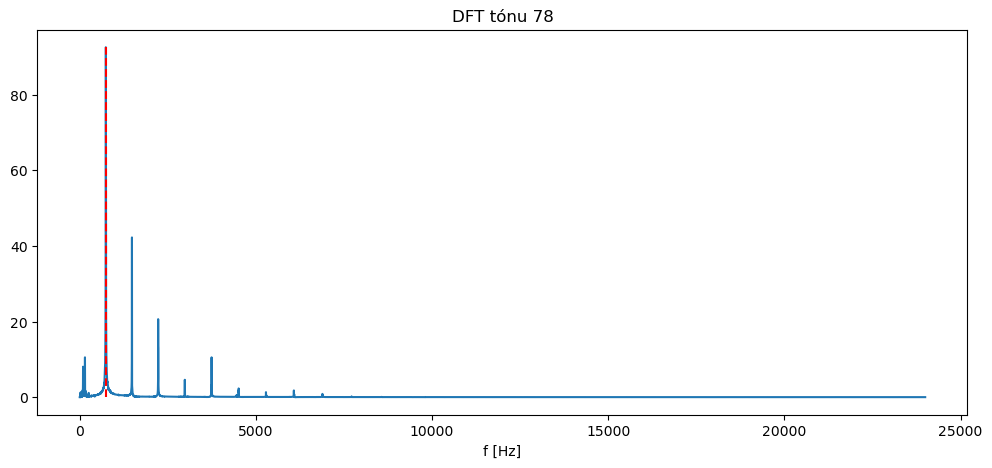

In [117]:
f0 = (np.arange(TONE_B_DFT.size) * Fs / TONE_B.size)[np.argmax(np.abs(TONE_B_DFT[:TONE_B_DFT.size//2]))]
plt.figure(figsize=(12,5))
plt.title('DFT tónu 78')
plt.xlabel('f [Hz]')
plt.plot(np.arange(TONE_B_DFT.size) * Fs / TONE_B.size, TONE_B_DFT)
plt.vlines(f0, 0, max(TONE_B_DFT), colors='red', linestyles='dashed')
plt.show()

### Tón 78

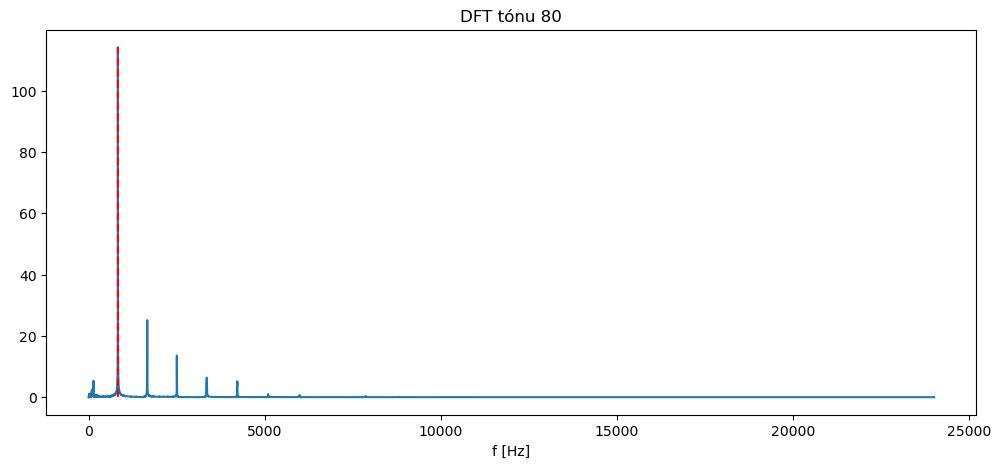

In [116]:
f0 = (np.arange(TONE_C_DFT.size) * Fs / TONE_C.size)[np.argmax(np.abs(TONE_C_DFT[:TONE_C_DFT.size//2]))]
plt.figure(figsize=(12,5))
plt.title('DFT tónu 80')
plt.xlabel('f [Hz]')
plt.plot(np.arange(TONE_C_DFT.size) * Fs / TONE_C.size, TONE_C_DFT)
plt.vlines(f0, 0, max(TONE_C_DFT), colors='red', linestyles='dashed')
plt.show()

In [115]:
# ÚKOL 4.3

### DTFT

In [65]:
for i in range(MIDIFROM, MIDITO + 1, 1):
    TONE = xall[i]
    FREQRANGE = 6
    f0_basic = f0_inacurrate[i]

    step = 0.01

    n = np.arange(0, TONE.size)
    A = np.zeros([int(FREQRANGE*2/step)+1, TONE.size],dtype=complex)
    j = 0
    for k in np.arange(f0_basic-FREQRANGE, f0_basic+FREQRANGE, step):
        A[j,:] = np.exp(-1j * 2 * np.pi * k * (n/TONE.size))
        j+=1
    Xdtft = np.matmul(A,TONE.T)
    precise_f0 = np.arange(f0_basic-FREQRANGE, f0_basic+FREQRANGE, step)[np.argmax(np.abs(Xdtft))]
    print("MIDI", i, "f0", precise_f0.round(4), "\t\t[DTFT]")



MIDI 24 f0 32.6745 		[DTFT]
MIDI 25 f0 34.6223 		[DTFT]
MIDI 26 f0 36.6816 		[DTFT]
MIDI 27 f0 38.871 		[DTFT]
MIDI 28 f0 41.1726 		[DTFT]
MIDI 29 f0 43.6258 		[DTFT]
MIDI 30 f0 46.222 		[DTFT]
MIDI 31 f0 48.9698 		[DTFT]
MIDI 32 f0 51.8681 		[DTFT]
MIDI 33 f0 54.9691 		[DTFT]
MIDI 34 f0 58.2332 		[DTFT]
MIDI 35 f0 61.6457 		[DTFT]
MIDI 36 f0 65.3138 		[DTFT]
MIDI 37 f0 69.1945 		[DTFT]
MIDI 38 f0 73.4369 		[DTFT]
MIDI 39 f0 77.8121 		[DTFT]
MIDI 40 f0 82.4142 		[DTFT]
MIDI 41 f0 87.3512 		[DTFT]
MIDI 42 f0 92.53 		[DTFT]
MIDI 43 f0 98.02 		[DTFT]
MIDI 44 f0 103.87 		[DTFT]
MIDI 45 f0 110.03 		[DTFT]
MIDI 46 f0 116.58 		[DTFT]
MIDI 47 f0 123.18 		[DTFT]
MIDI 48 f0 130.43 		[DTFT]
MIDI 49 f0 138.17 		[DTFT]
MIDI 50 f0 147.09 		[DTFT]
MIDI 51 f0 155.88 		[DTFT]
MIDI 52 f0 165.18 		[DTFT]
MIDI 53 f0 349.86 		[DTFT]
MIDI 54 f0 370.67 		[DTFT]
MIDI 55 f0 392.72 		[DTFT]
MIDI 56 f0 208.12 		[DTFT]
MIDI 57 f0 220.49 		[DTFT]
MIDI 58 f0 233.6 		[DTFT]
MIDI 59 f0 247.46 		[DTFT]
MIDI 60 f0 262.

# ÚKOL 4.4